In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
import warnings
warnings.simplefilter('ignore')

In [8]:
ds = pd.read_csv("../data/vgsales.csv")

In [9]:
data = ds.copy()

# Оцінимо кількість та відсоток відсутніх значень у кожному стовпці

In [10]:
# Підрахунок відсутніх значень і їхній відсоток від загальної кількості
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

missing_info = pd.DataFrame({
    "Missing Values": missing_data,
    "Percentage": missing_percentage
})

# Фільтрація стовпців де є відсутні значення
missing_info[missing_info["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)

,Missing Values,Percentage


Оскільки дані відсутні то можемо приступити до категоріальних ознак

# Кодування категоріальних ознак

Спершу визначимо категоріальні стовпці і їх унікальні значення для вибору методу кодування.

In [11]:
# Виявлення категоріальних стовпців
categorical_columns = data.select_dtypes(include=['object']).columns

map_dicts = dict()
for column in categorical_columns:
    data[column] = data[column].astype('category')
    map_dicts[column] = dict(zip(data[column], data[column].cat.codes))
    data[column] = data[column].cat.codes
    
data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,10849,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9201,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5493,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,10851,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7247,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


# Виявлення аномальних значень за допомогою графіків

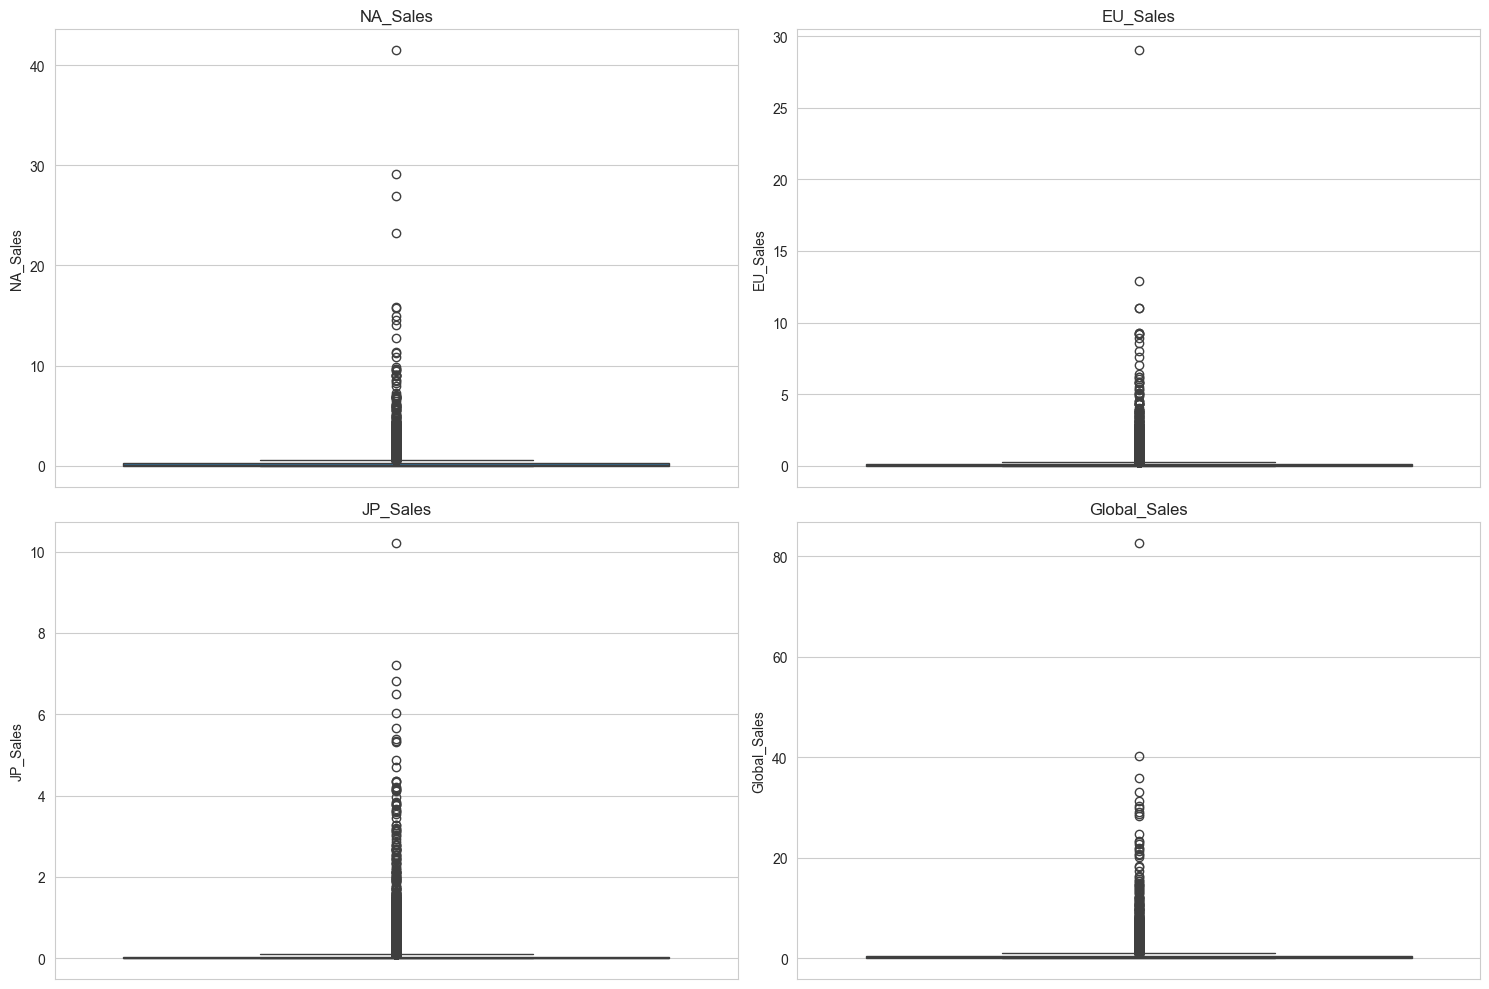

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
# Вибірка стовпців для візуалізації викидів
numeric_columns_for_plot = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

# Налаштування розміру графіка
plt.figure(figsize=(15, 10))

# Створення ящиків з вусами для кожного стовпця
for i, col in enumerate(numeric_columns_for_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data[data[col].notnull()][col])
    plt.title(col)

plt.tight_layout()
plt.show()